In [ ]:
# insights into various attributes of loan applicants in India, essential for assessing their eligibility for loan approval.

In [1]:
# download file csv from kaggle using colab

In [2]:
from google.colab import files

kaggle_json_path = "/content/kaggle.json"

files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving Applicant-details.csv to Applicant-details.csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
import pandas as pd
import numpy as np

In [4]:
applicant_details = pd.read_csv('Applicant-details.csv')

In [5]:
applicant_details.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


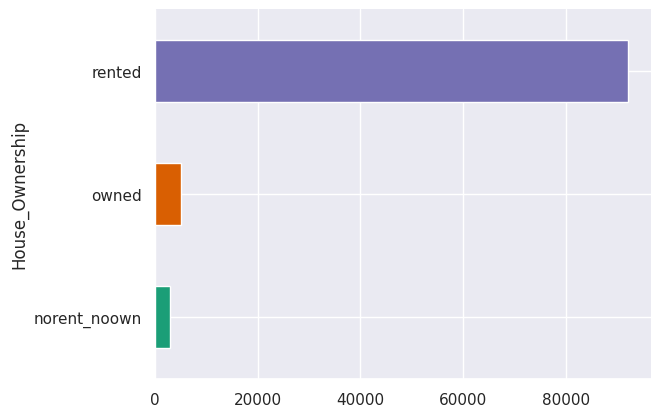

In [61]:
# @title House_Ownership

from matplotlib import pyplot as plt
import seaborn as sns
applicant_details.groupby('House_Ownership').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

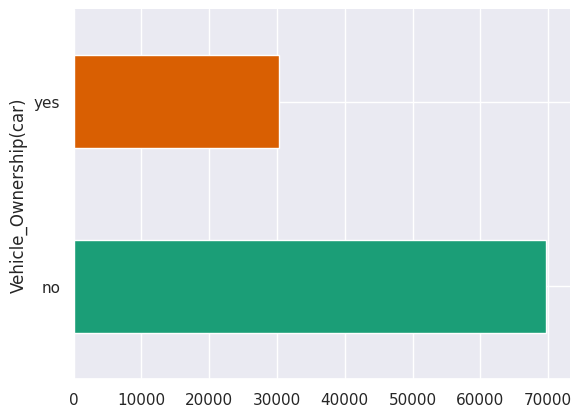

In [60]:
# @title Vehicle_Ownership(car)

from matplotlib import pyplot as plt
import seaborn as sns
applicant_details.groupby('Vehicle_Ownership(car)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

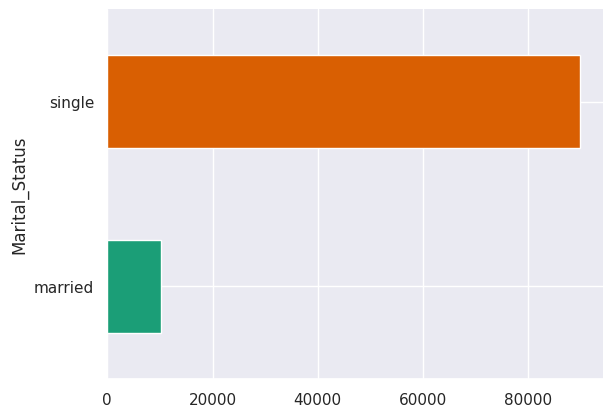

In [59]:
# @title Marital_Status

from matplotlib import pyplot as plt
import seaborn as sns
applicant_details.groupby('Marital_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
applicant_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Applicant_ID                 100000 non-null  int64 
 1   Annual_Income                100000 non-null  int64 
 2   Applicant_Age                100000 non-null  int64 
 3   Work_Experience              100000 non-null  int64 
 4   Marital_Status               100000 non-null  object
 5   House_Ownership              100000 non-null  object
 6   Vehicle_Ownership(car)       100000 non-null  object
 7   Occupation                   100000 non-null  object
 8   Residence_City               100000 non-null  object
 9   Residence_State              100000 non-null  object
 10  Years_in_Current_Employment  100000 non-null  int64 
 11  Years_in_Current_Residence   100000 non-null  int64 
 12  Loan_Default_Risk            100000 non-null  int64 
dtypes: int64(7), ob

In [44]:
# Generate descriptive statistics of the dataframe

applicant_details.describe()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,5.001617e+06,49.995400,10.110750,6.342990,11.996020,0.129970
std,28867.657797,2.876394e+06,17.056051,5.996007,3.644942,1.396826,0.336272
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,25000.750000,2.507092e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,50000.500000,5.004938e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,75000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,100000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
# the categorical variables, such as `Marital_Status`, `House_Ownership`, `Vehicle_Ownership(car)`, and `Occupation`, relate to loan default risk

In [28]:
# Calculating Proportion of loan defaulters by Marital Status

In [27]:
# Calculate and display the proportion of loan defaulters for each category of Marital_Status
marital_status_default = applicant_details.groupby('Marital_Status')['Loan_Default_Risk'].mean()
print("Proportion of loan defaulters by Marital Status:")
print(marital_status_default)

# Calculate and display the proportion of loan defaulters for each category of House_Ownership
house_ownership_default = applicant_details.groupby('House_Ownership')['Loan_Default_Risk'].mean()
print("\nProportion of loan defaulters by House Ownership:")
print(house_ownership_default)

# Calculate and display the proportion of loan defaulters for each category of Vehicle_Ownership(car)
vehicle_ownership_default = applicant_details.groupby('Vehicle_Ownership(car)')['Loan_Default_Risk'].mean()
print("\nProportion of loan defaulters by Vehicle Ownership:")
print(vehicle_ownership_default)

# Calculate and display the proportion of loan defaulters for each category of Occupation
occupation_default = applicant_details.groupby('Occupation')['Loan_Default_Risk'].mean()
print("\nProportion of loan defaulters by Occupation:")
print(occupation_default)

Proportion of loan defaulters by Marital Status:
Marital_Status
married    0.110189
single     0.132226
Name: Loan_Default_Risk, dtype: float64

Proportion of loan defaulters by House Ownership:
House_Ownership
norent_noown    0.091134
owned           0.090140
rented          0.133362
Name: Loan_Default_Risk, dtype: float64

Proportion of loan defaulters by Vehicle Ownership:
Vehicle_Ownership(car)
no     0.143286
yes    0.099390
Name: Loan_Default_Risk, dtype: float64

Proportion of loan defaulters by Occupation:
Occupation
Air_traffic_controller        0.147101
Analyst                       0.120746
Architect                     0.145563
Army_officer                  0.175901
Artist                        0.125918
Aviator                       0.154344
Biomedical_Engineer           0.129966
Chartered_Accountant          0.169704
Chef                          0.127413
Chemical_engineer             0.122185
Civil_engineer                0.143564
Civil_servant                 0.116853
C

In [29]:
# Here are the insights we gathered based on the proportion of loan defaulters among different categories:

# Marital Status:
# Single applicants have a higher loan default risk (13.2%) compared to married applicants (11.0%).

# House Ownership:
# Applicants who rent have the highest loan default risk (13.3%).
# Applicants who own their houses or do not rent but also don’t own (possibly living with parents or other family members) have a lower loan default risk (~9.1%).

# Vehicle Ownership:
# Applicants who do not own a vehicle have a higher loan default risk (14.3%) compared to vehicle owners (9.9%).

# Occupation:
# The loan default risk varies significantly across different occupations.
# Police officers appear to have the highest loan default risk (18.6%), while technology specialists have the lowest (7.0%).

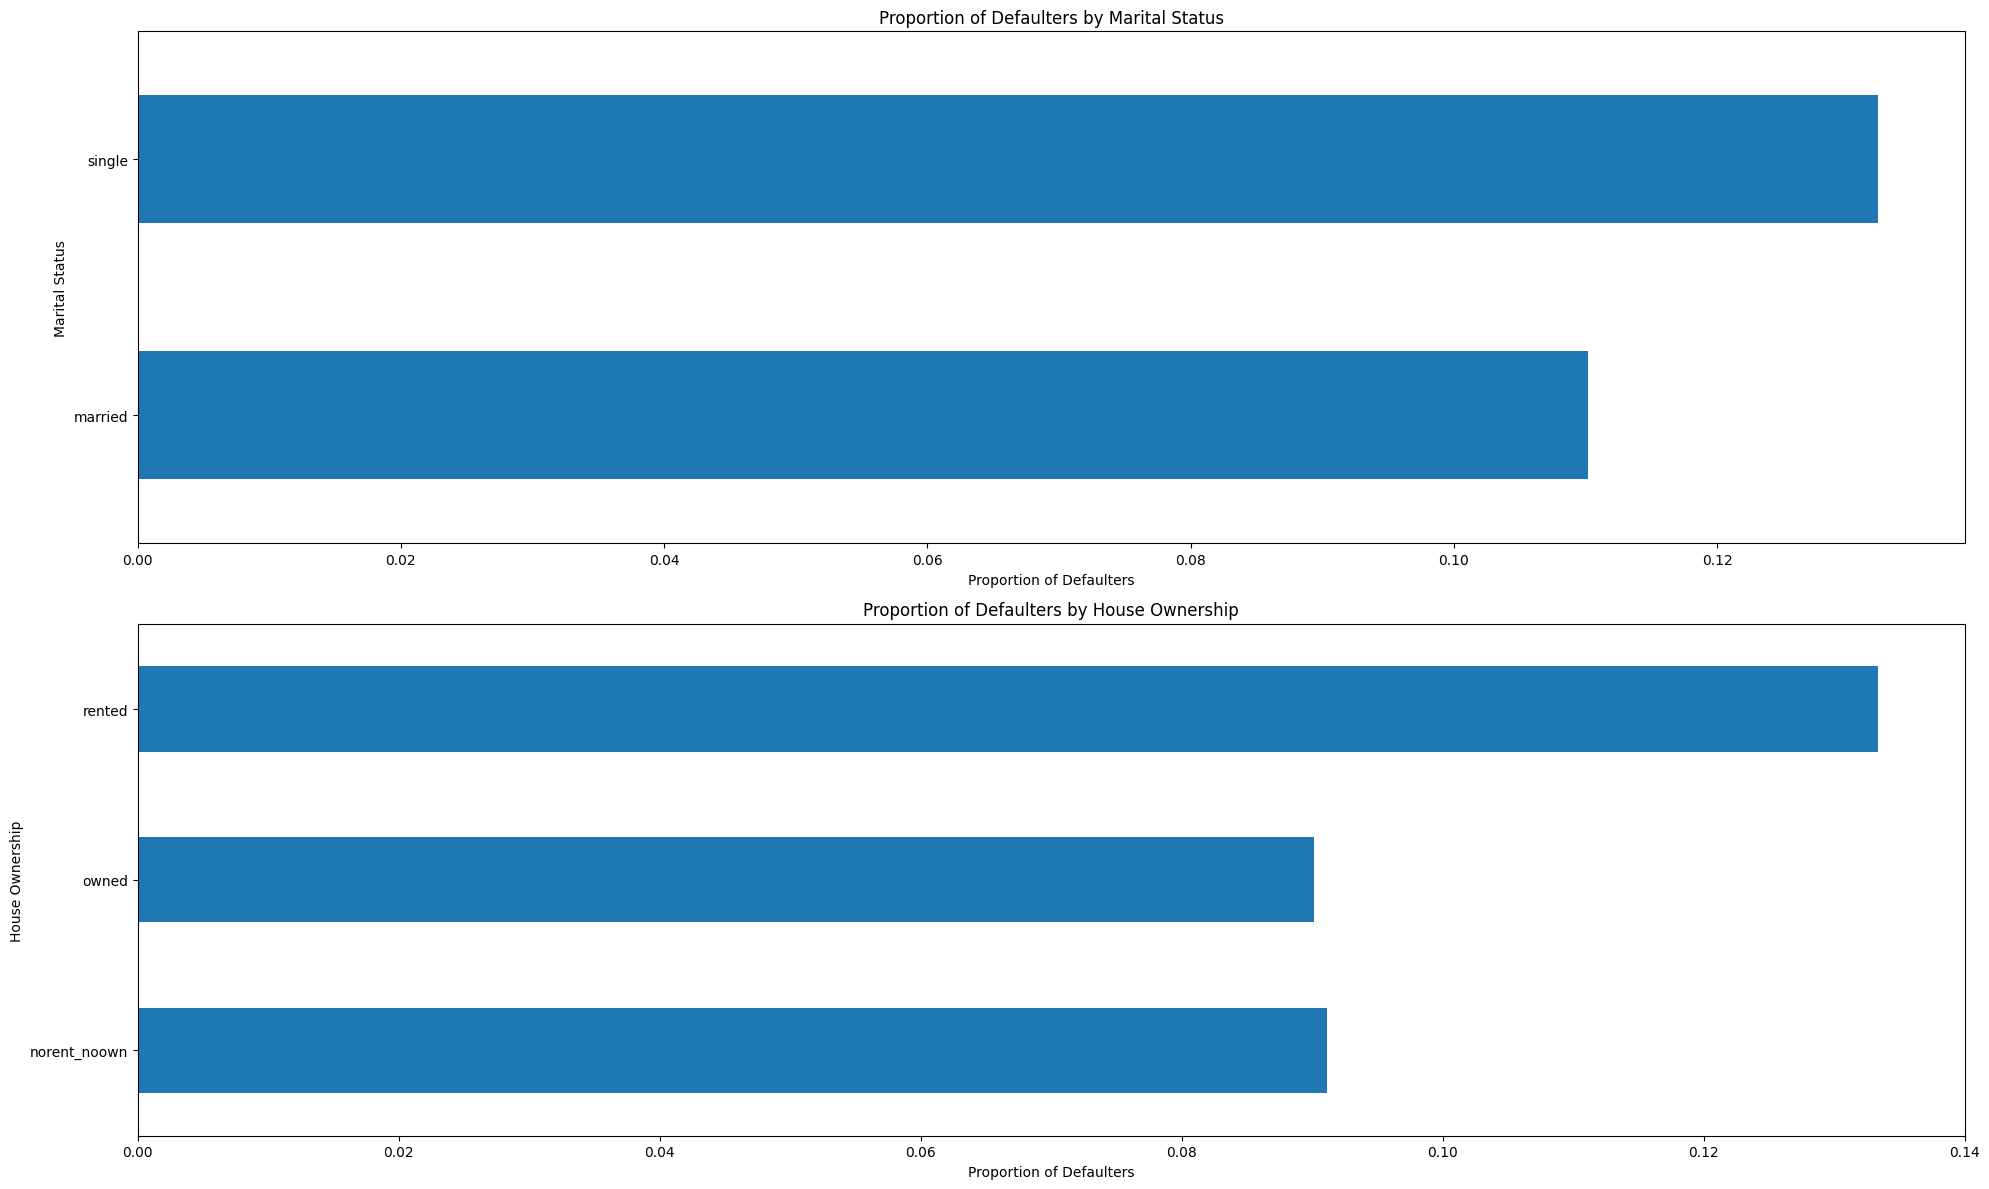

In [39]:
# Create subplots for each categorical variable to visualize the proportion of loan defaulters

# Initialize the figure
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# Plot for Marital_Status
marital_status_default.plot(kind='barh', ax=axes[0])
axes[0].set_title('Proportion of Defaulters by Marital Status')
axes[0].set_xlabel('Proportion of Defaulters')
axes[0].set_ylabel('Marital Status')  # Added ylabel for clarity

# Plot for House_Ownership
house_ownership_default.plot(kind='barh', ax=axes[1])
axes[1].set_title('Proportion of Defaulters by House Ownership')
axes[1].set_xlabel('Proportion of Defaulters')
axes[1].set_ylabel('House Ownership')  # Added ylabel for clarity

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [50]:
# To generate the visualizations of these proportions, we need to import the required libraries first.

import matplotlib.pyplot as plt
import seaborn as sns

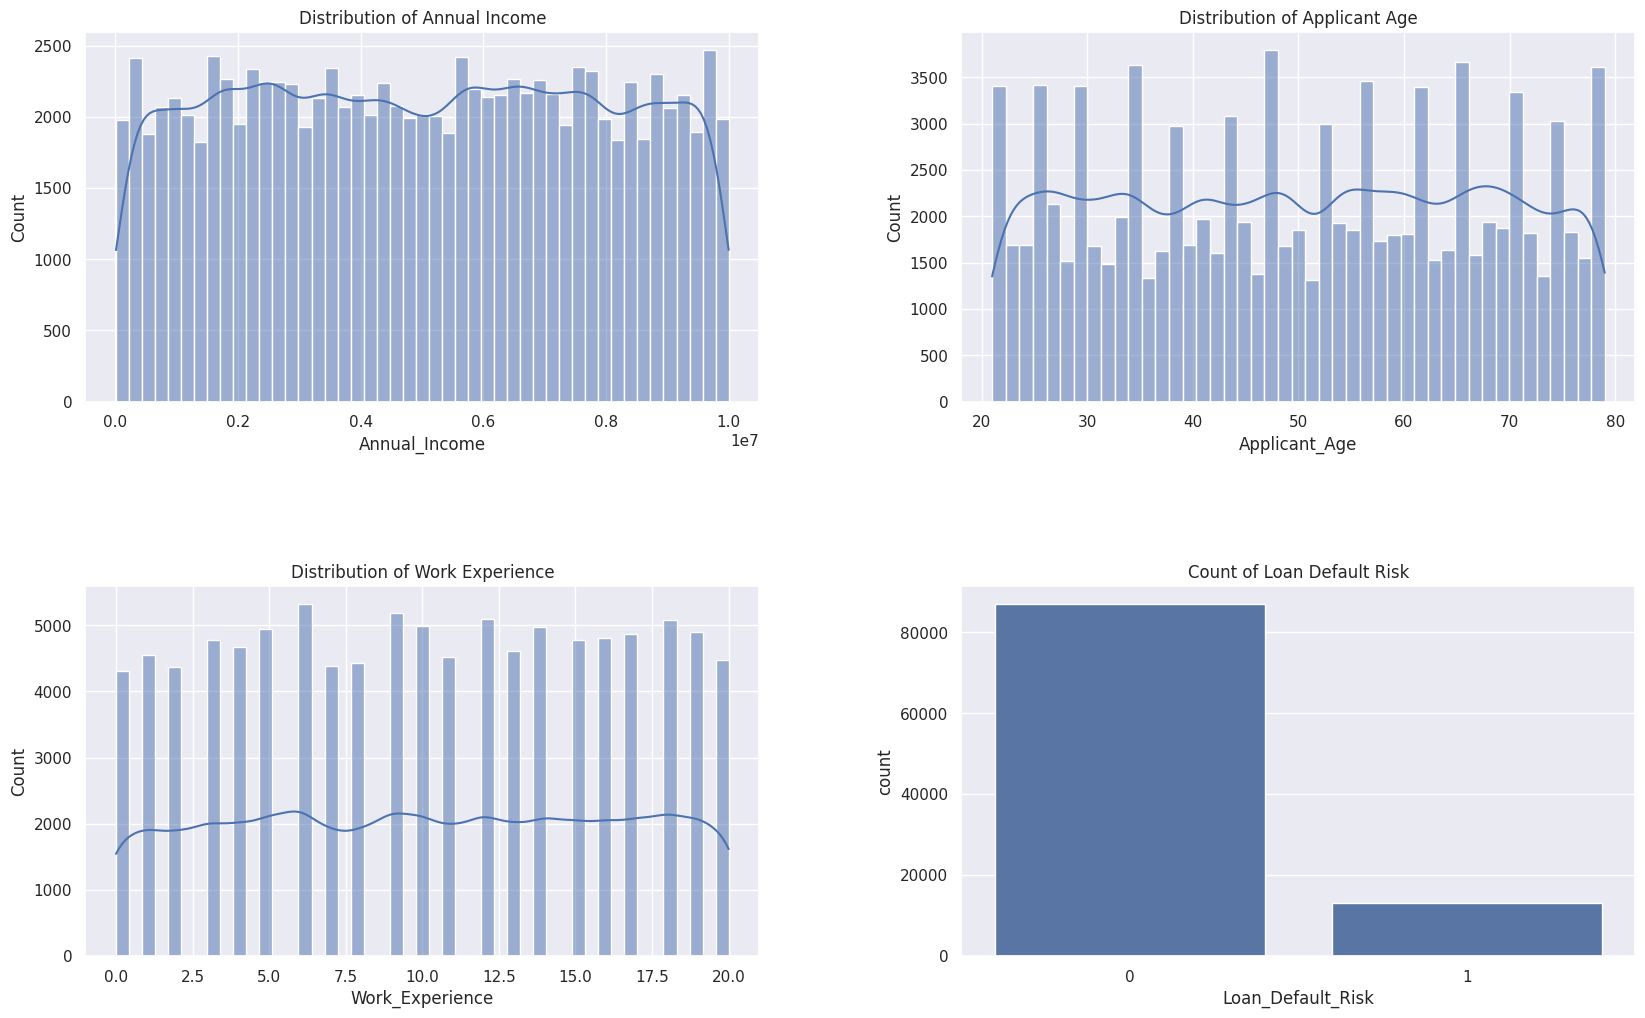

In [51]:
# Set the theme for seaborn plots
sns.set_theme()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Plot the distribution of Annual_Income
sns.histplot(data=applicant_details, x='Annual_Income', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Annual Income')

# Plot the distribution of Applicant_Age
sns.histplot(data=applicant_details, x='Applicant_Age', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Applicant Age')

# Plot the distribution of Work_Experience
sns.histplot(data=applicant_details, x='Work_Experience', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Work Experience')

# Plot the count of Loan_Default_Risk
sns.countplot(data=applicant_details, x='Loan_Default_Risk', ax=axes[1, 1])
axes[1, 1].set_title('Count of Loan Default Risk')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()